In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

In [2]:
df=pd.read_csv('crime_data.csv')
df.rename({'Unnamed: 0':'Place'}, axis = 1, inplace = True)

In [3]:
df

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

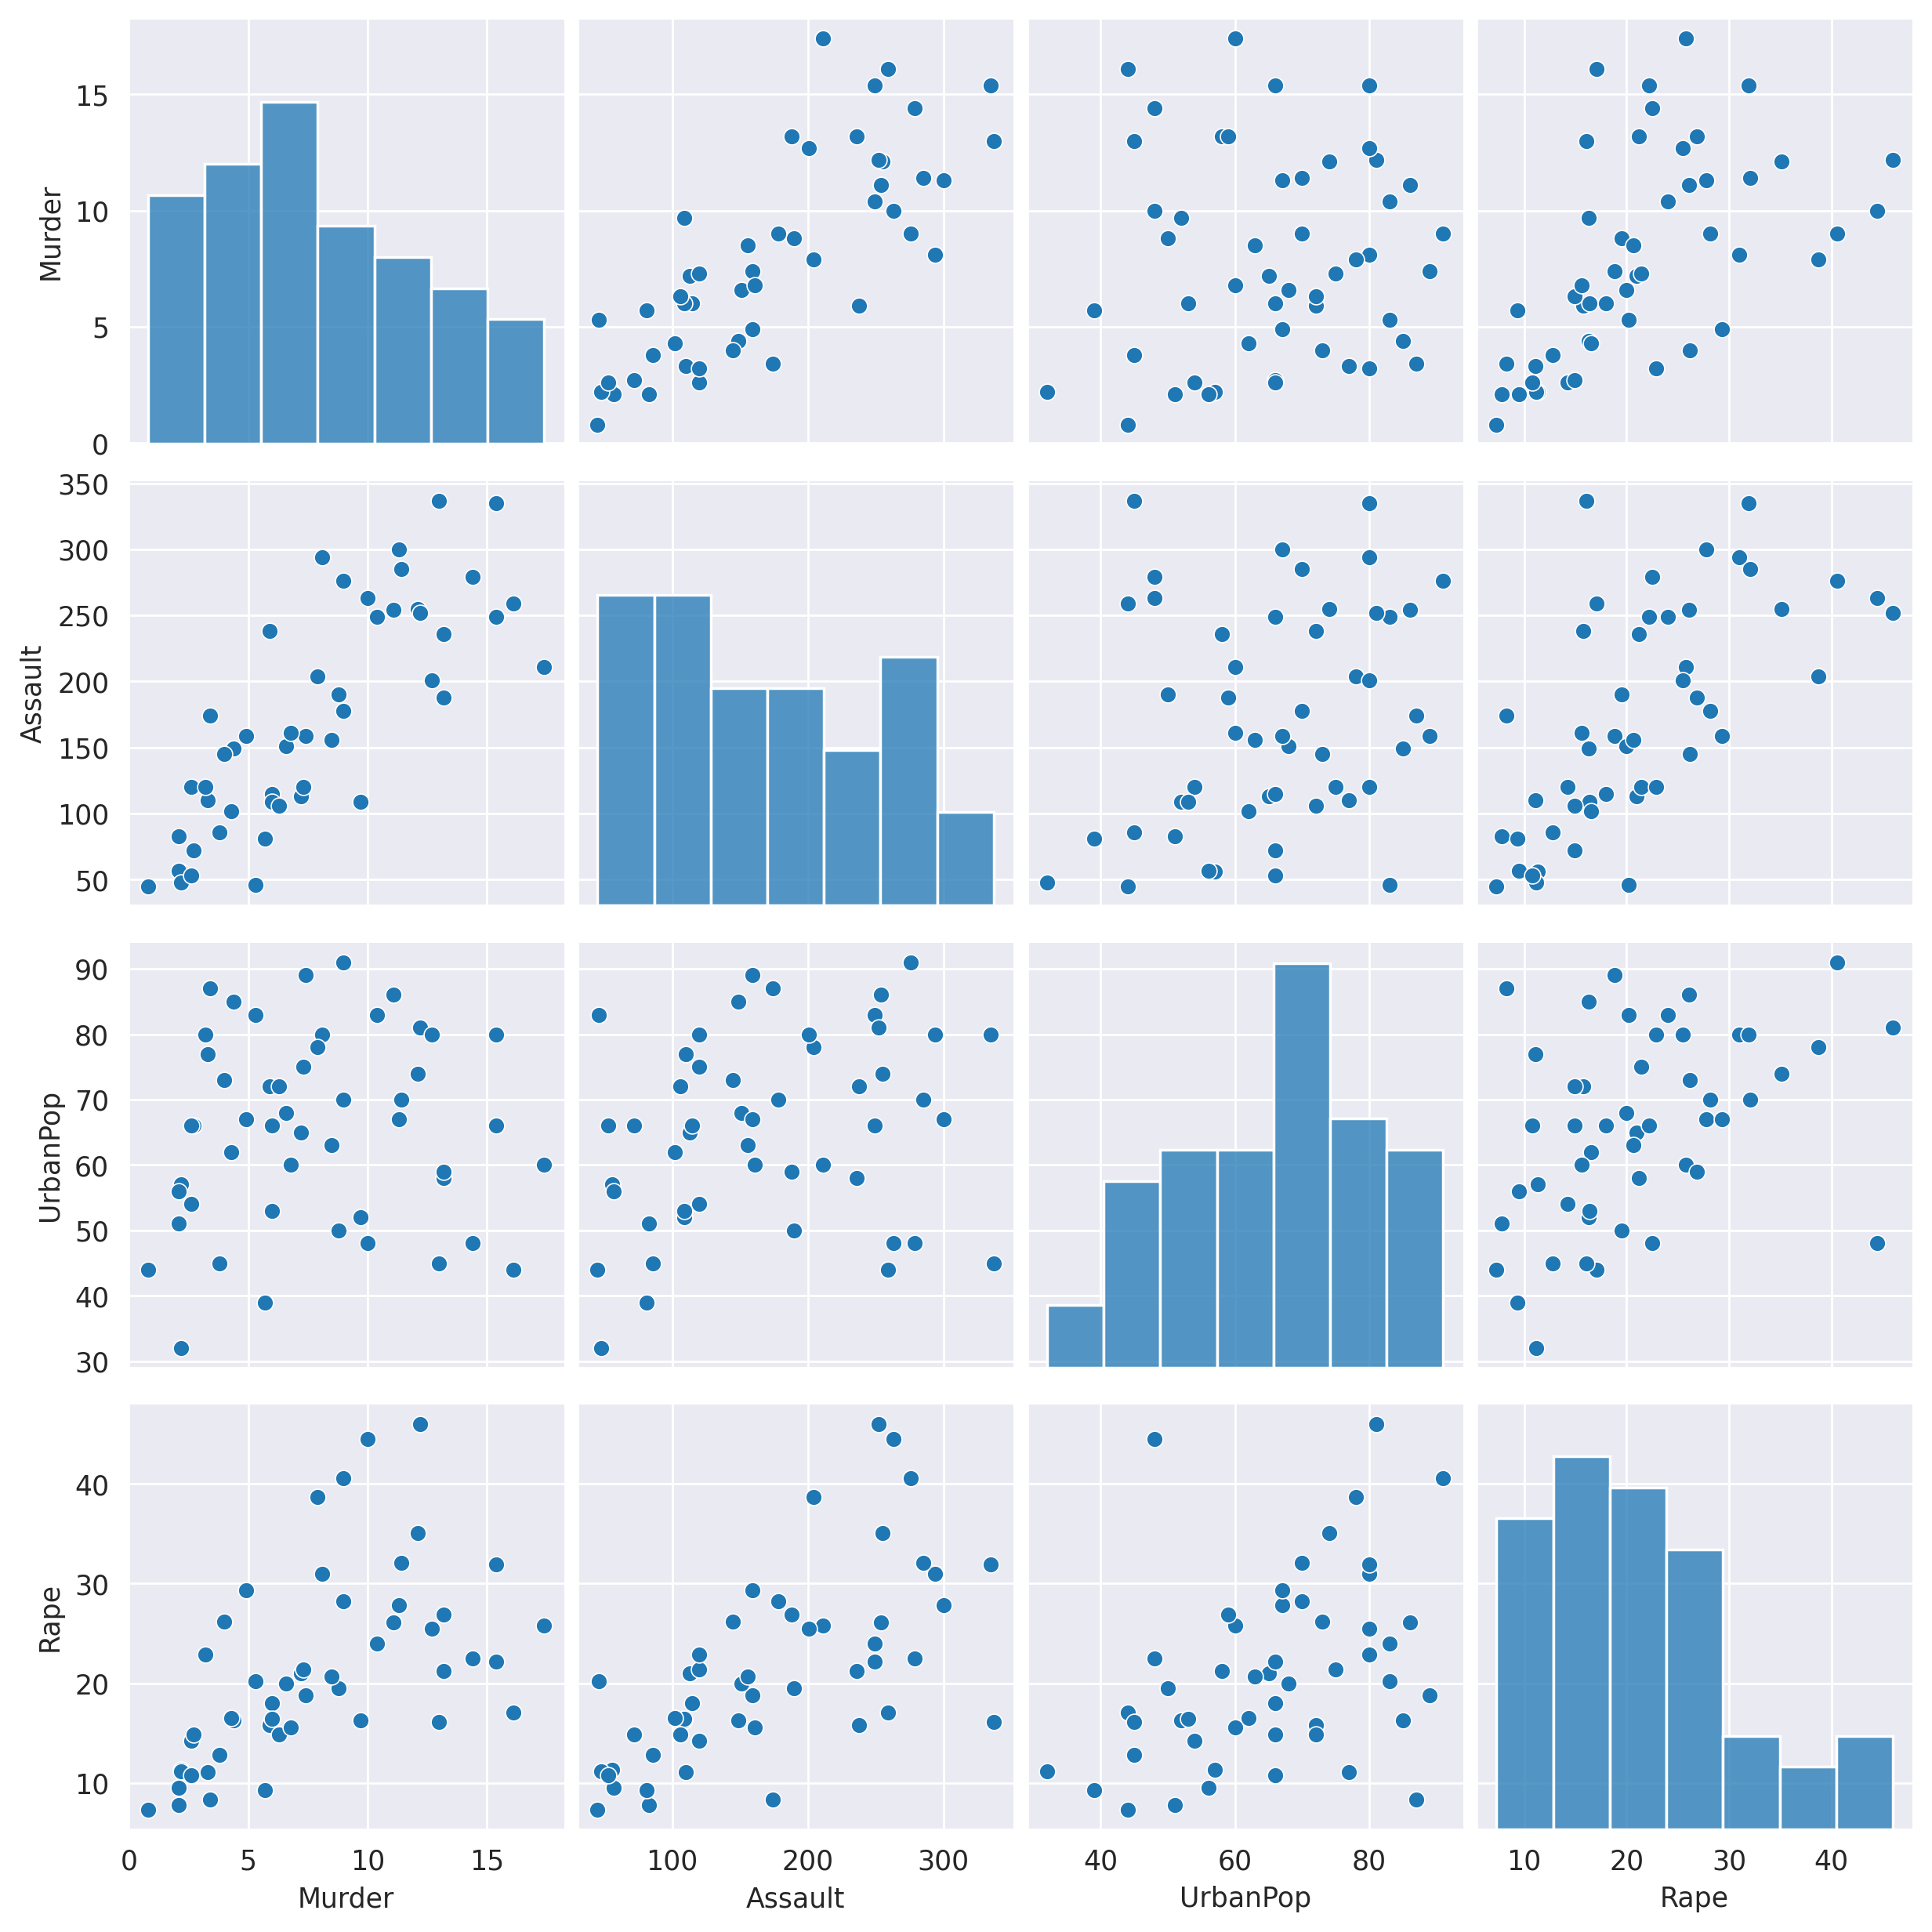

In [5]:
sns.pairplot(df)

In [6]:
df1 = df.drop(columns=['Place'])
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
# Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()
x=sc.fit_transform(df1)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [11]:
from scipy.cluster import hierarchy


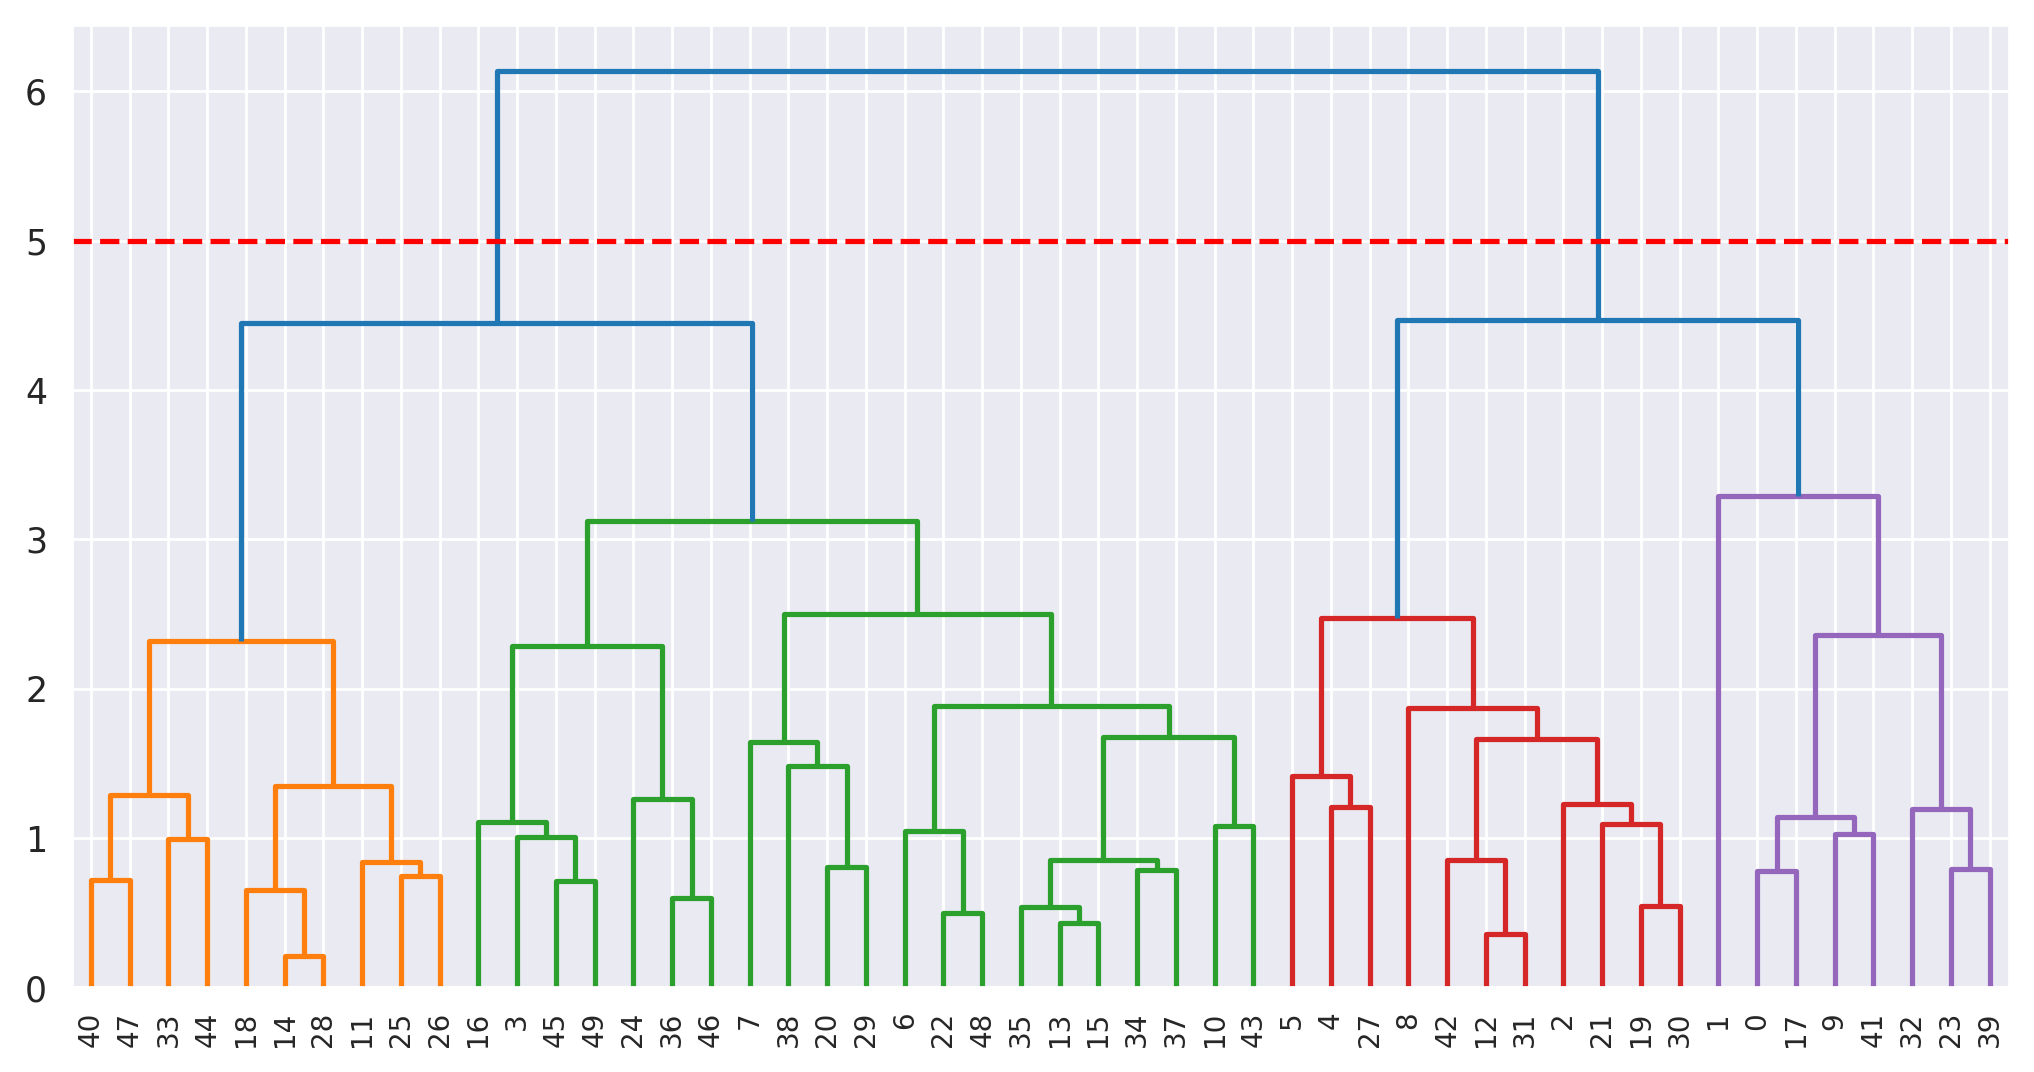

In [12]:
lk = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 5, c = 'red', linestyle = '--')

In [13]:
# Model Building
from sklearn.cluster import AgglomerativeClustering

In [14]:
hc=AgglomerativeClustering(n_clusters=2)
y=hc.fit_predict(x)

In [15]:
y

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [16]:
df['cluster']=y
df

,Place,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [28]:
#Evaluating Silhouette Score For Hierarchical Clustering Model

In [29]:
silhouette_score(x,y)

0.4047944502519567

In [30]:
#KMEANS clustering

In [31]:
from sklearn.cluster import KMeans

In [32]:
# Standardization
sc = StandardScaler()
x = sc.fit_transform(df1)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [33]:
#model building for KMeans Clustering

In [34]:
km=KMeans(n_clusters = 2)
y_km=km.fit_predict(x)
y_km

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
df['Km_cluster'] = y_km
df.head(5)

,Place,Murder,Assault,UrbanPop,Rape,cluster,Km_cluster
0,Alabama,13.2,236,58,21.2,1,0
1,Alaska,10.0,263,48,44.5,1,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,0


In [36]:
km.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.67675778, -0.68274685, -0.13306084, -0.57037591]])

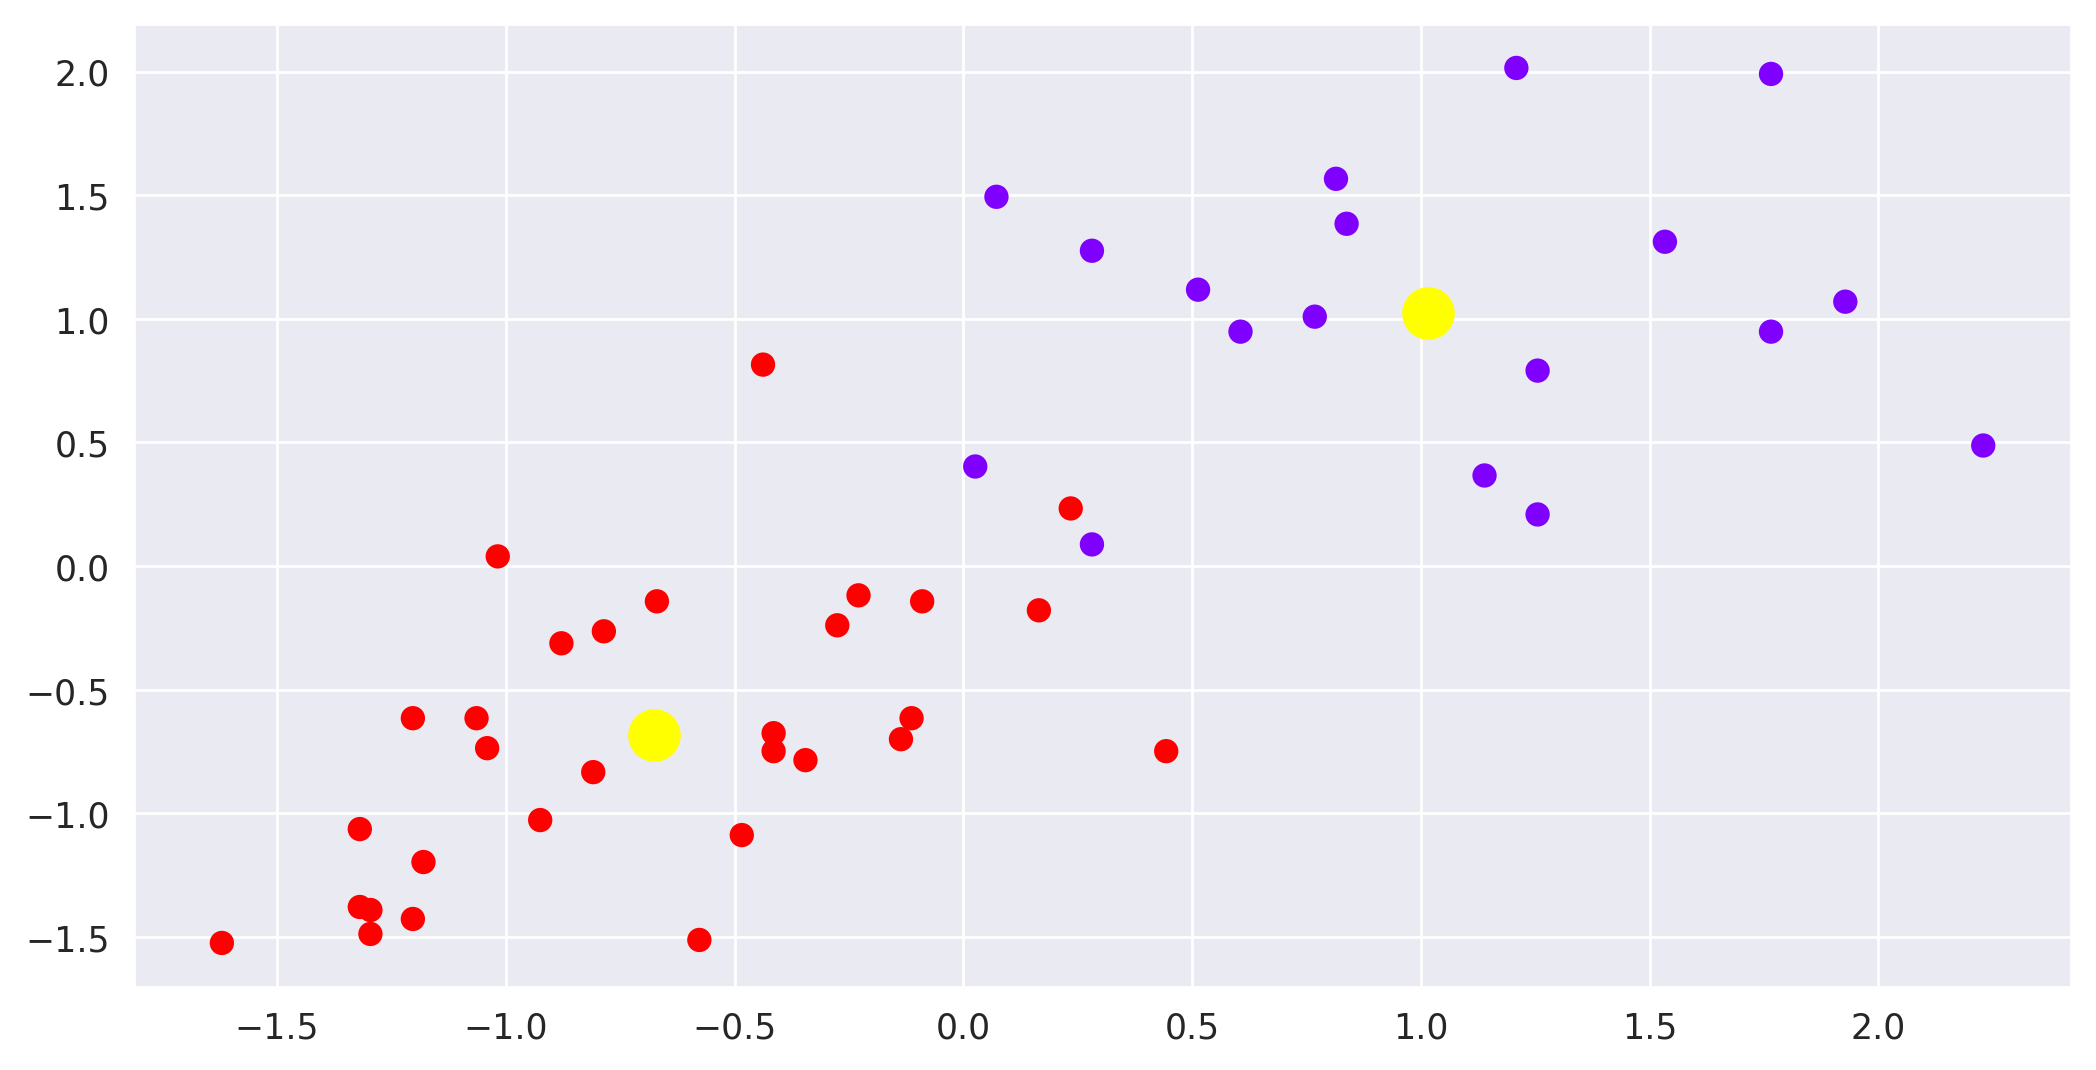

In [37]:
plt.scatter(x[:,0],x[:,1],c =y_km, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s = 200, c = 'yellow')

In [38]:
silhouette_score(x,y_km)

0.4084890326217641

In [39]:
# Elbow Graph
wcss = []

for i in range(1,8):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [40]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.08743315681842,
 44.07022642167419,
 40.56362324296069]

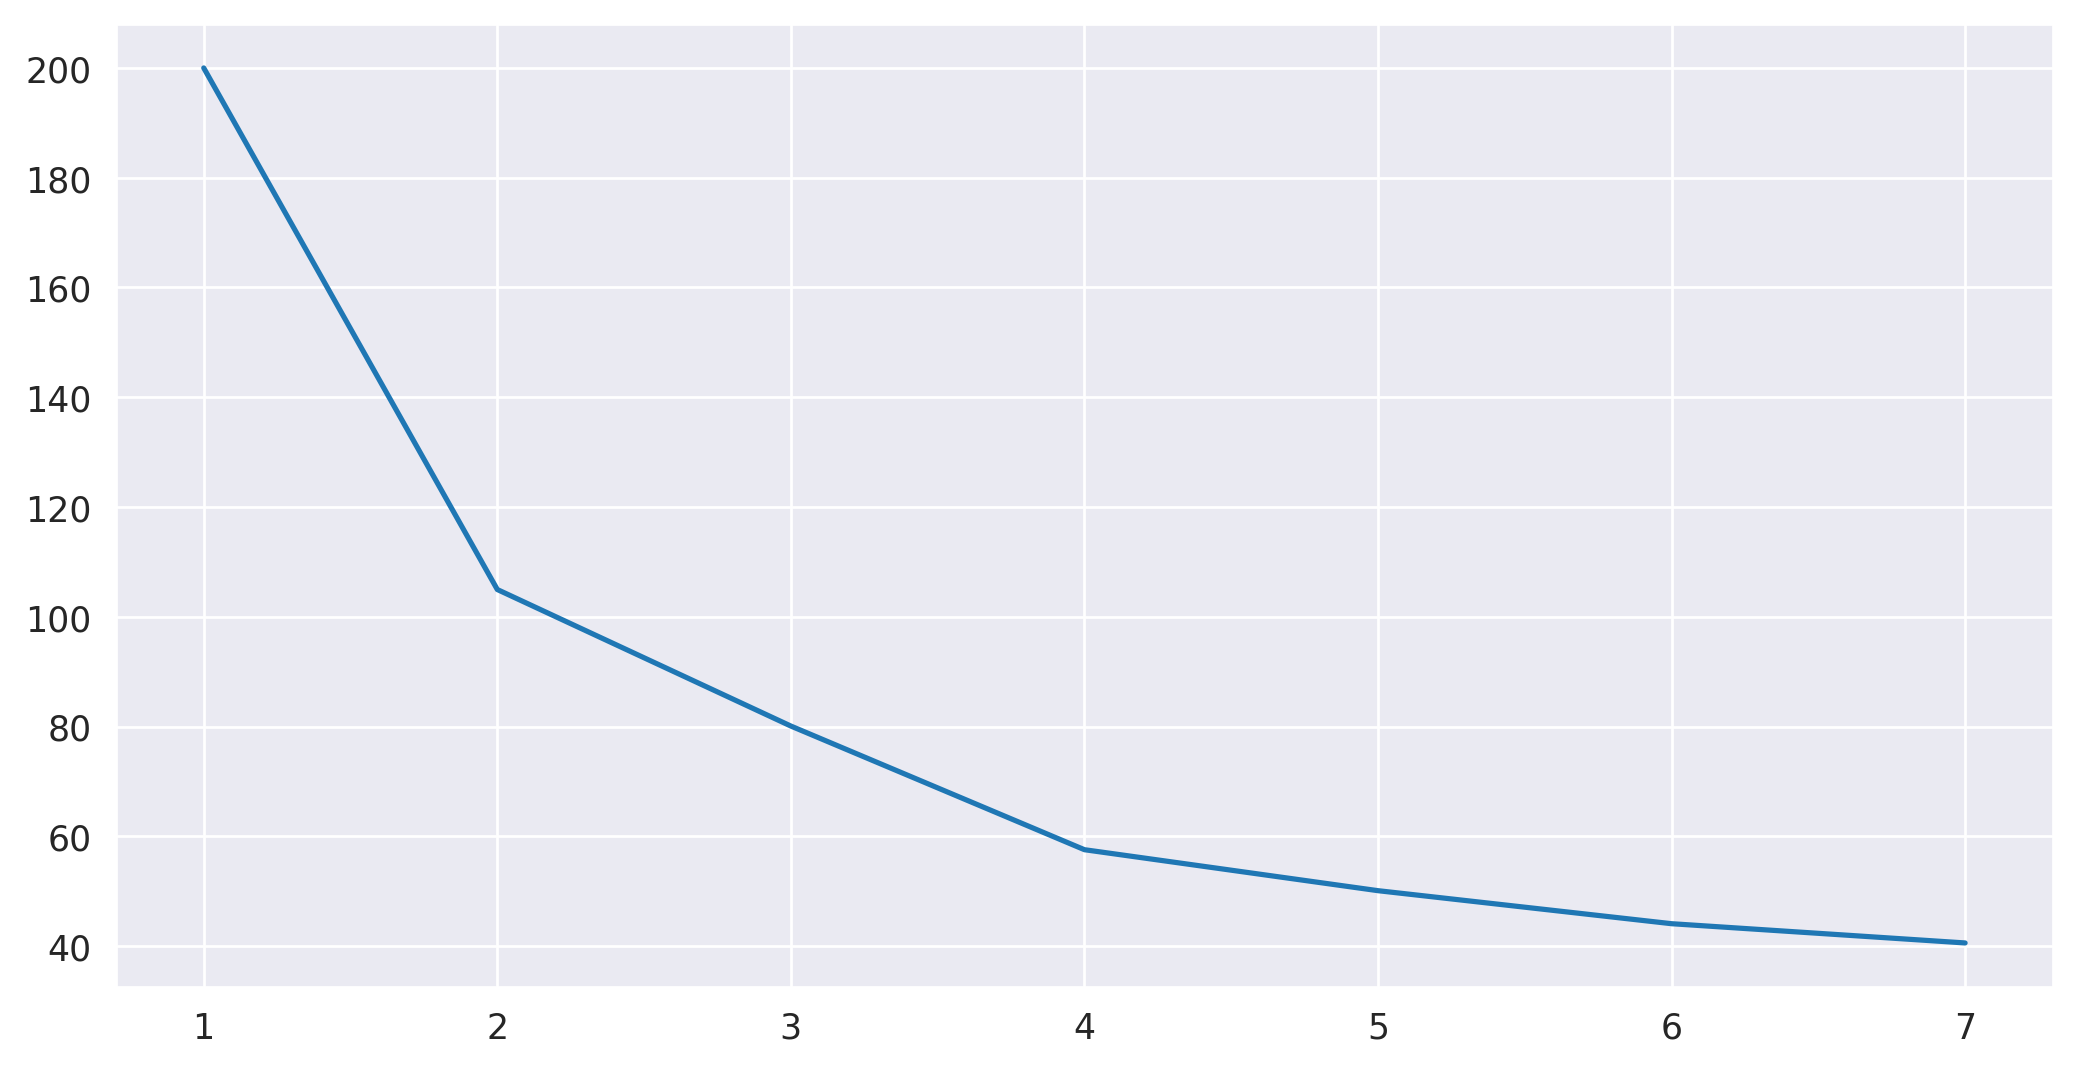

In [41]:
plt.plot(range(1,8),wcss)

In [42]:
#Final Model

km = KMeans(n_clusters=4)
ypred = km.fit_predict(x)
ypred

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

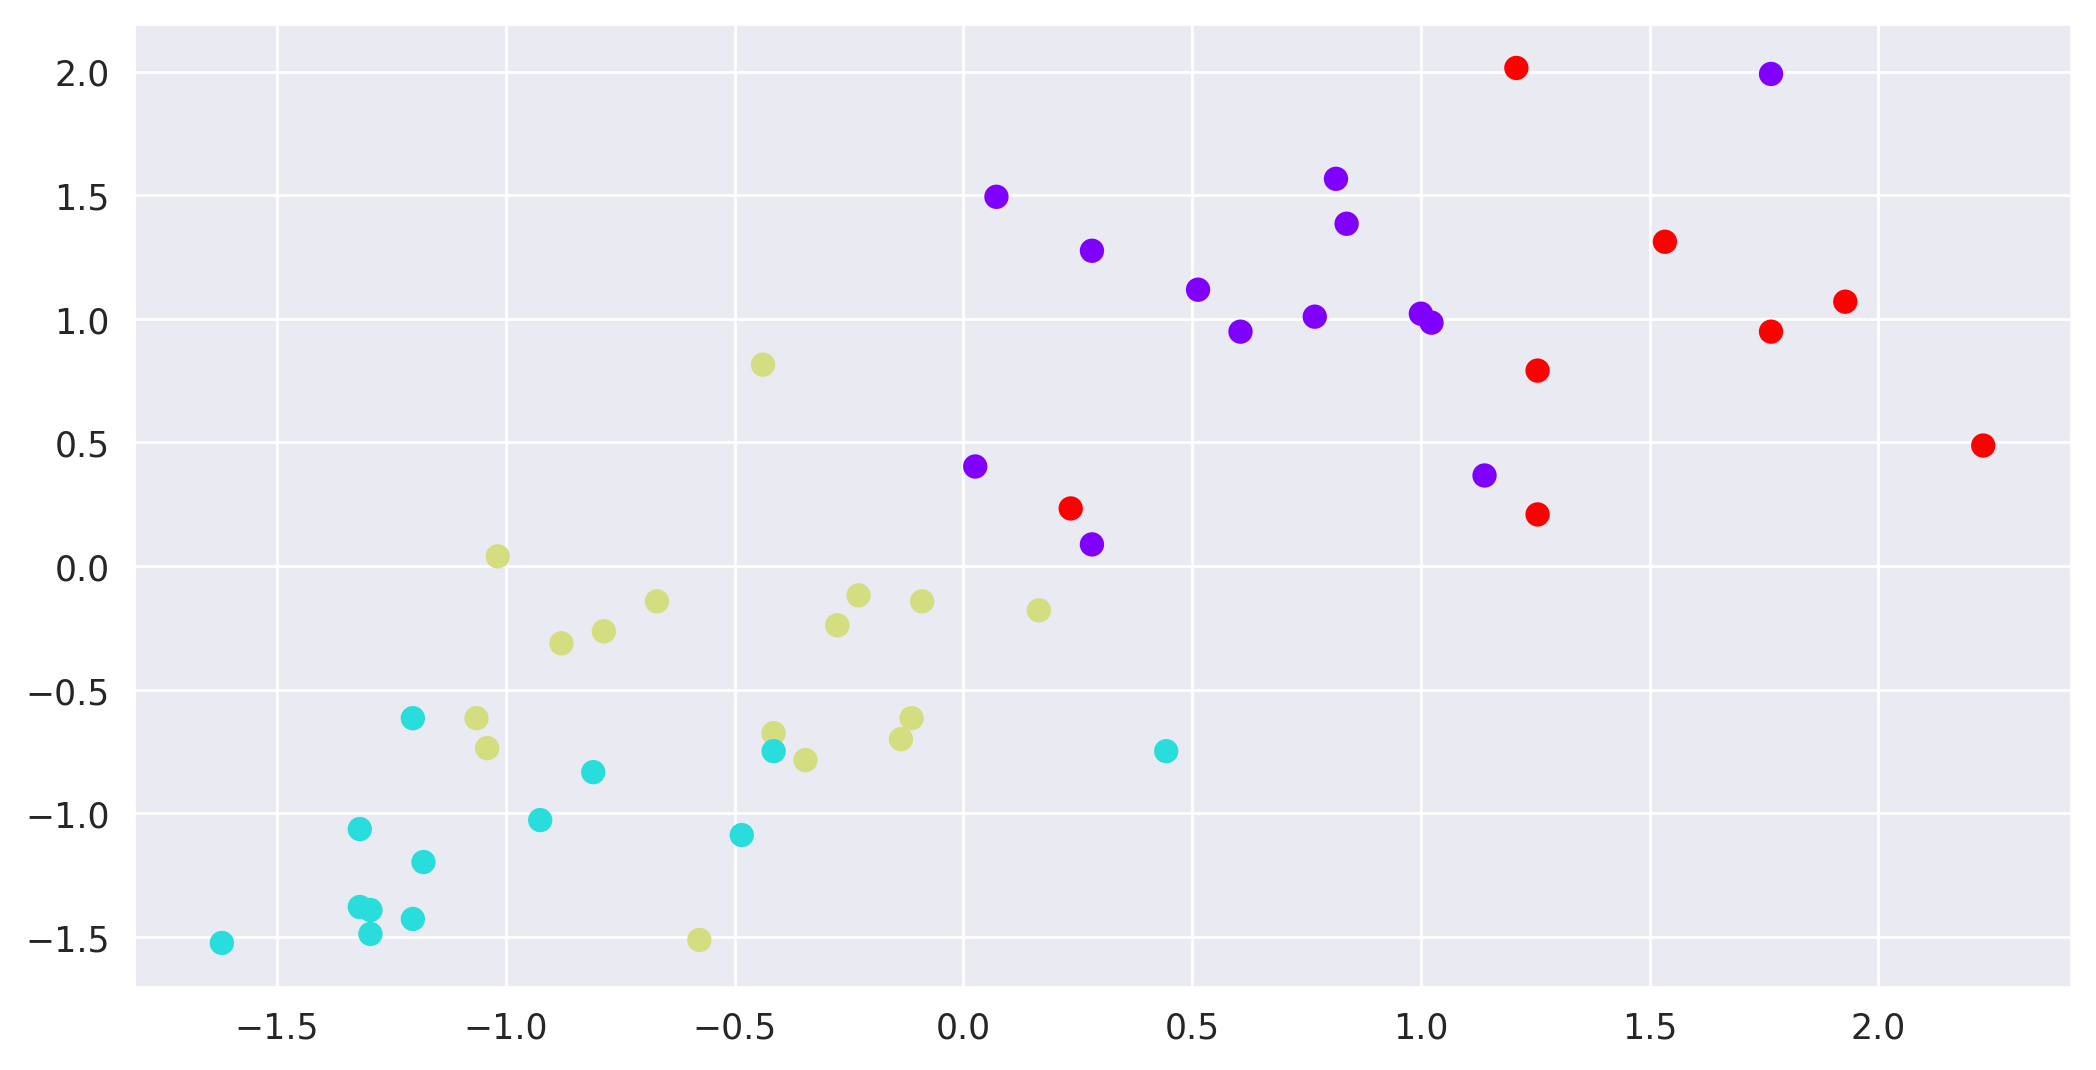

In [43]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')

In [44]:
km.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

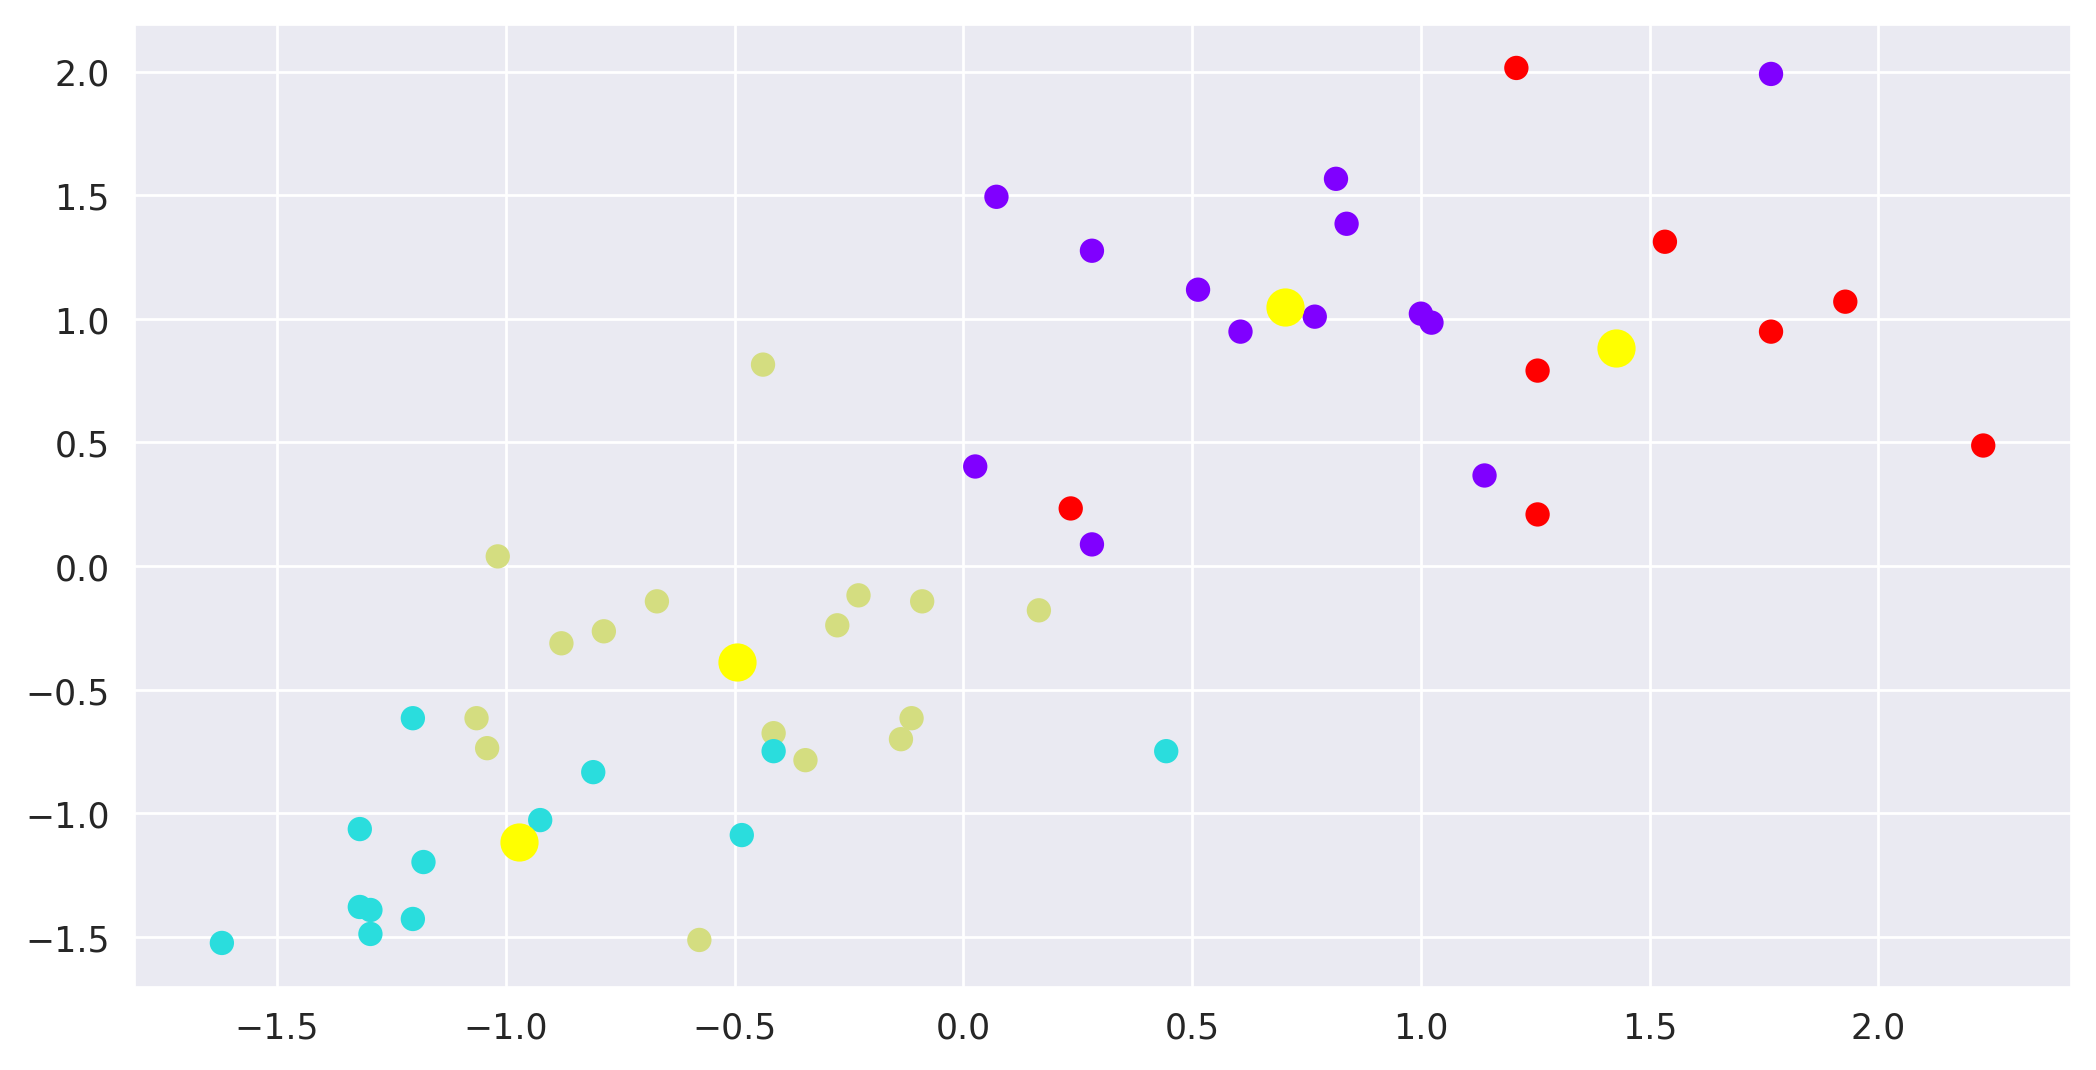

In [45]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'yellow',s=100)

In [46]:
silhouette_score(x,ypred)

0.33968891433344395

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

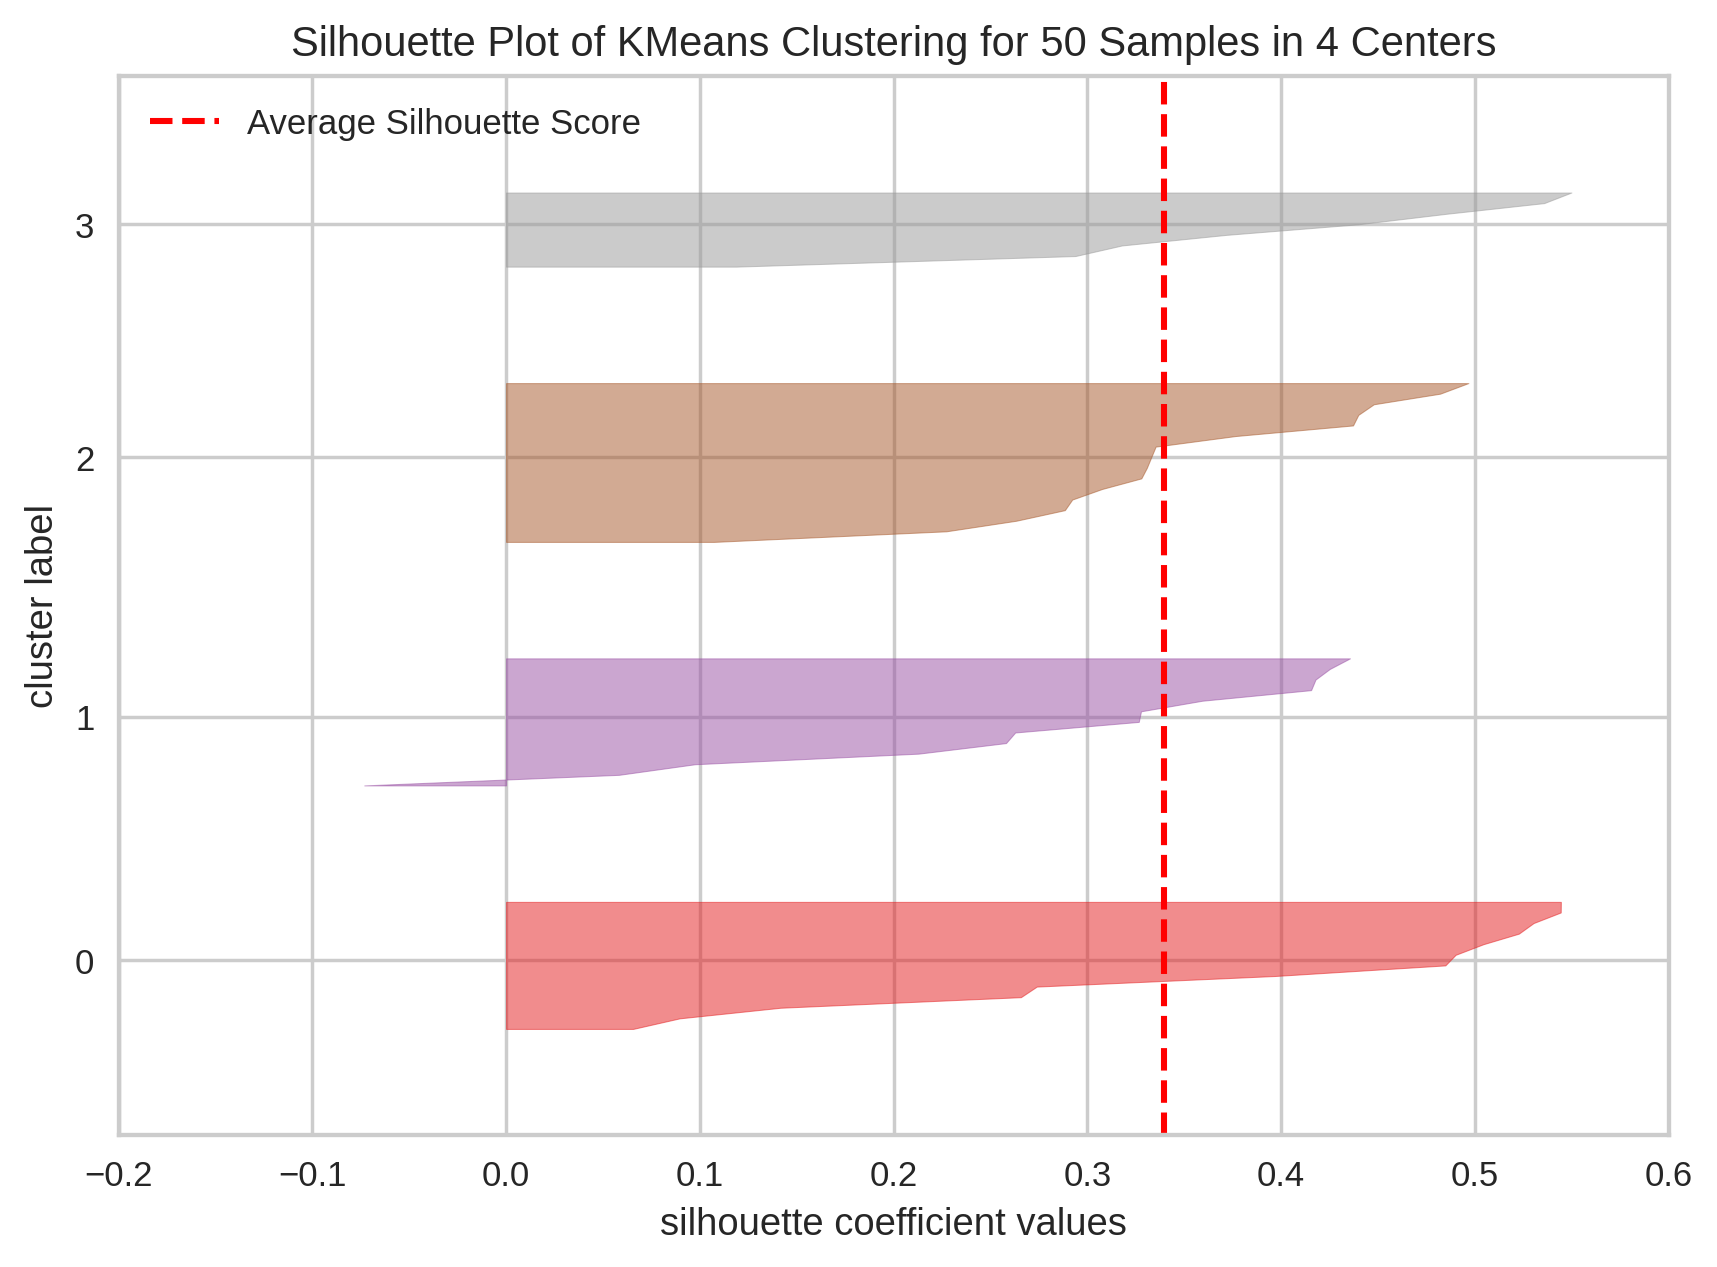

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
model = SilhouetteVisualizer(KMeans(n_clusters=4))
vis = model.fit(x)
vis.show()

In [49]:
# DBSCAN
#K-Dist plot

In [50]:
from sklearn.neighbors import NearestNeighbors

In [51]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [52]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.780062,0.849285
1,0.0,2.078984,2.136971
2,0.0,1.048220,1.083411
3,0.0,1.001328,1.007227
4,0.0,1.208977,1.300691
5,0.0,1.248863,1.300691
6,0.0,0.881004,0.956432
7,0.0,1.192276,1.271401
8,0.0,1.309743,1.349263
9,0.0,0.867978,1.022502


In [53]:
dist = np.sort(d[:,1])

Text(0, 0.5, 'Epsilon value')

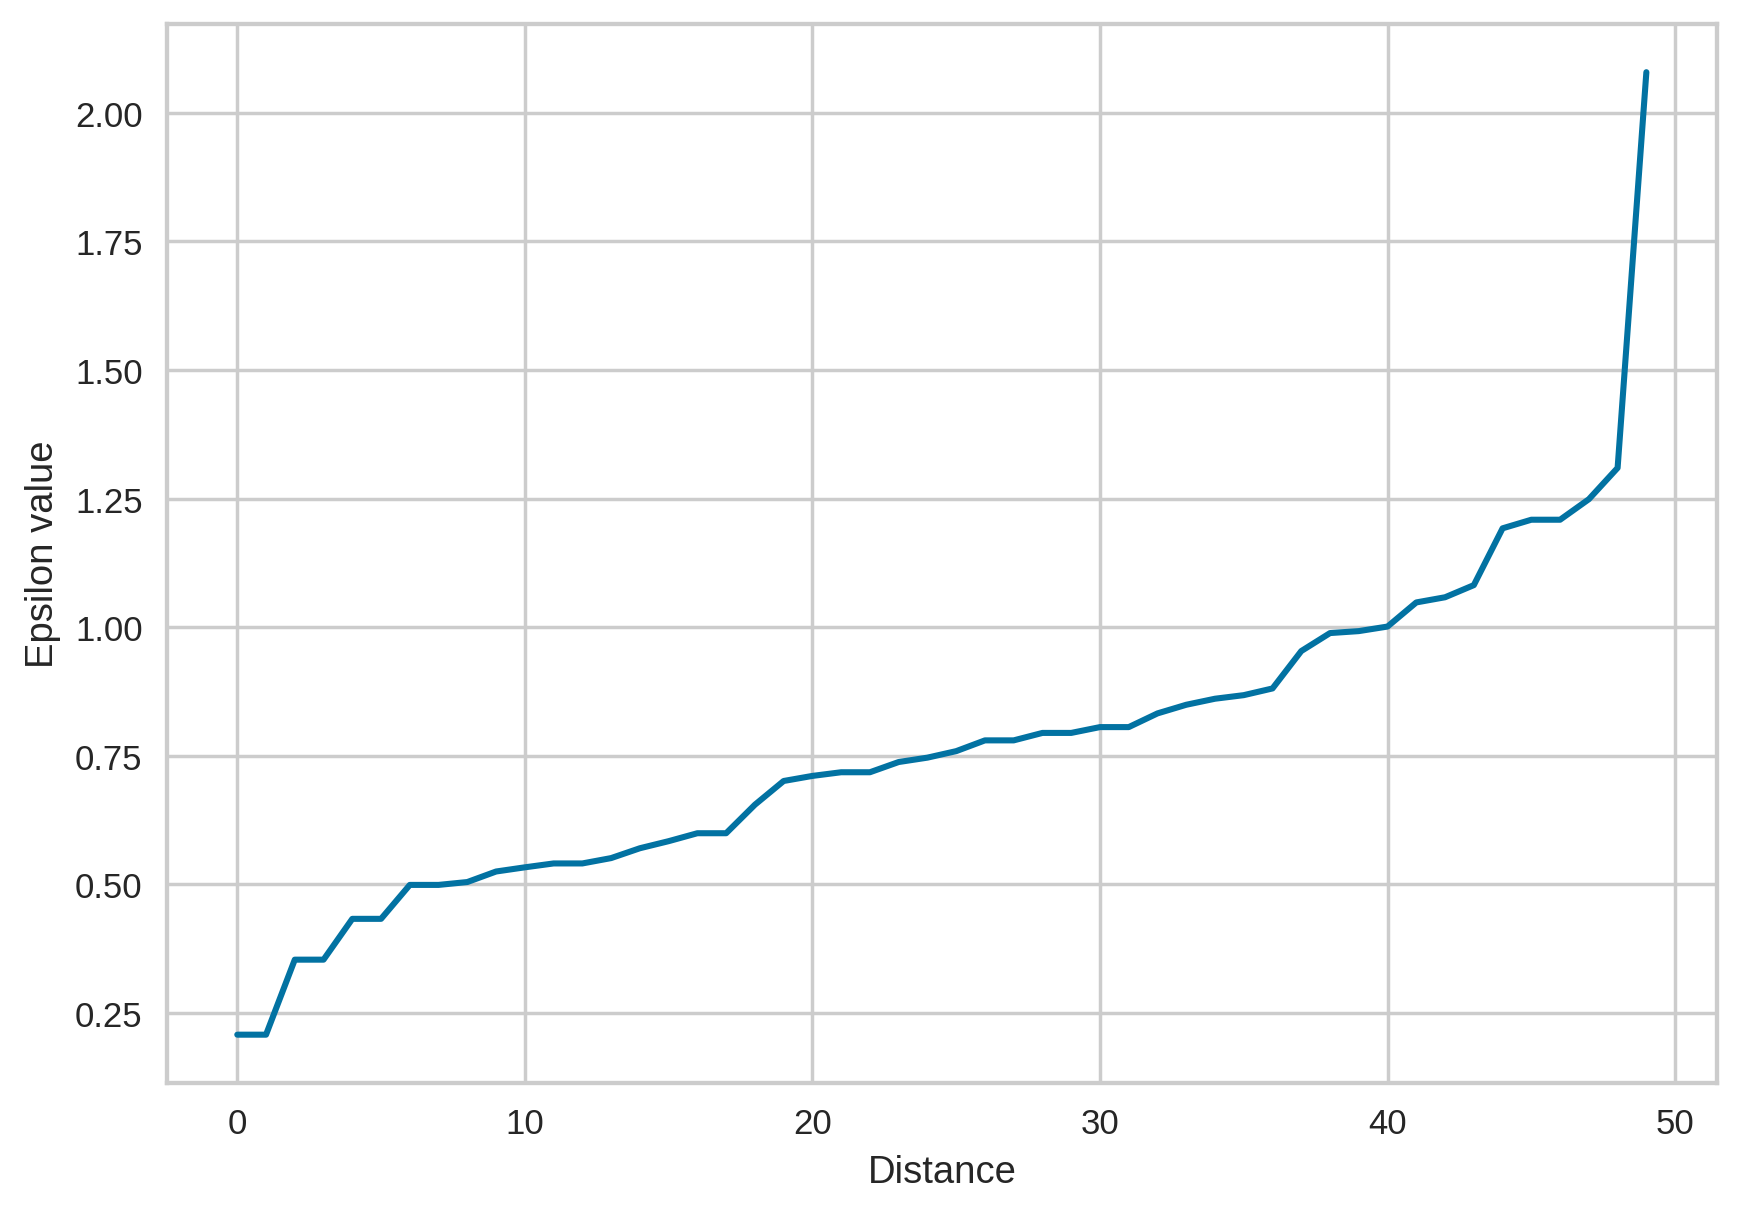

In [54]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon value')

In [55]:
sc = StandardScaler()

In [56]:
#Feature scaling
x = sc.fit_transform(df1)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [57]:
#Model Building

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
db = DBSCAN(eps=1.15, min_samples=5)

y_db = db.fit_predict(x)
y_db

array([ 0, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [60]:
# Adding clusters to dataset
df['db_clusters']=y_db
df

,Place,Murder,Assault,UrbanPop,Rape,cluster,Km_cluster,db_clusters
0,Alabama,13.2,236,58,21.2,1,0,0
1,Alaska,10.0,263,48,44.5,1,0,-1
2,Arizona,8.1,294,80,31.0,1,0,-1
3,Arkansas,8.8,190,50,19.5,0,1,1
4,California,9.0,276,91,40.6,1,0,-1
5,Colorado,7.9,204,78,38.7,1,0,-1
6,Connecticut,3.3,110,77,11.1,0,1,1
7,Delaware,5.9,238,72,15.8,0,1,-1
8,Florida,15.4,335,80,31.9,1,0,-1
9,Georgia,17.4,211,60,25.8,1,0,0


In [61]:
df.groupby('db_clusters').agg('mean')

,Murder,Assault,UrbanPop,Rape,cluster,Km_cluster
db_clusters,,,,,,
-1,11.106667,266.800000,71.933333,30.153333,0.933333,0.066667
0,14.720000,232.600000,58.200000,23.720000,1.000000,0.000000
1,4.973333,112.433333,63.566667,16.356667,0.000000,0.966667


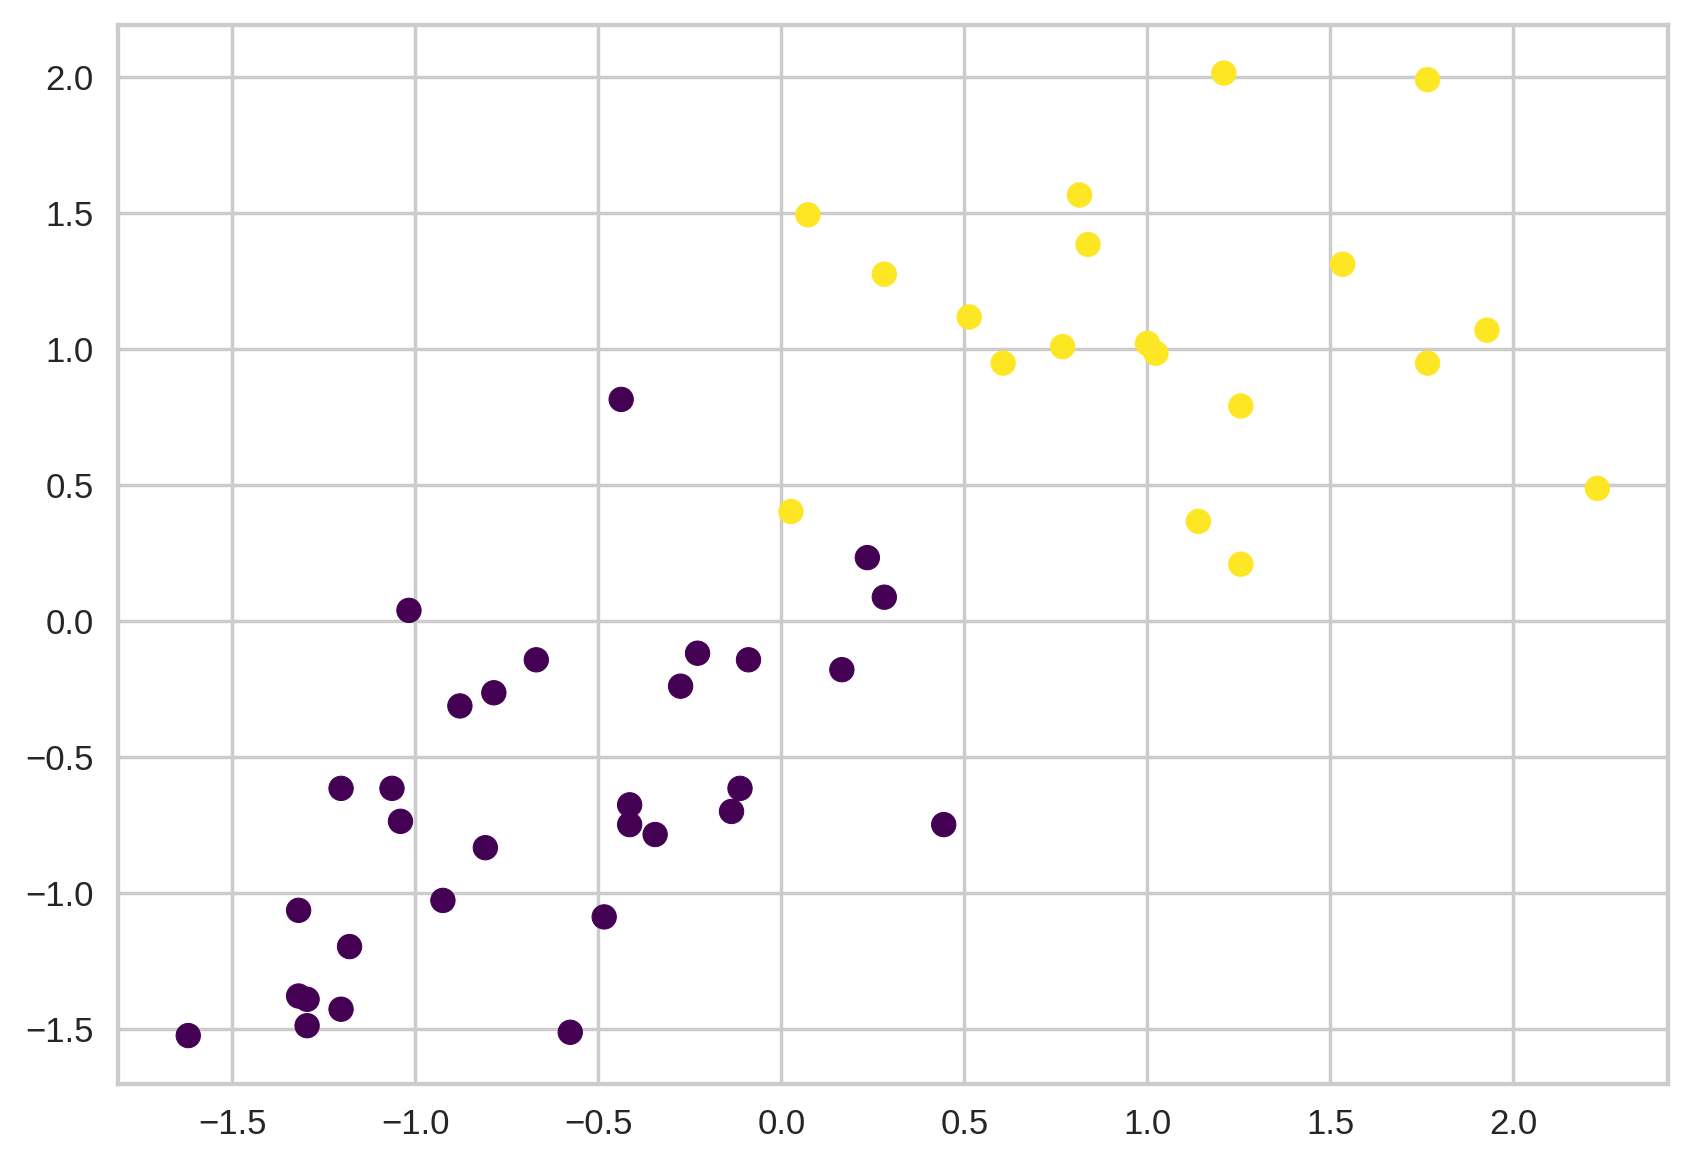

In [62]:
plt.scatter(x[:,0],x[:,1],c = y,cmap='viridis')

In [63]:
silhouette_score(x,y)

0.4047944502519567